In [98]:
import pandas as pd
import sidetable
import regex as re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv("datos/attacks_pandas_8.csv", index_col= 0)

Lo primero que tenemos que evaluar es en que columnas tenemos nulos y que cantidad tenemos en cada una. ¿Hay alguna columna con una gran cantidad de nulos? En caso de que sea así deberemos eliminarla.


In [100]:
df.stb.missing()

,missing,total,percent
siglo,6287,7789,80.716395
age,6271,7789,80.510977
species_,6243,7789,80.151496
location,6168,7789,79.188599
area,6163,7789,79.124406
sex_,6131,7789,78.713570
country,6127,7789,78.662216
country_,6127,7789,78.662216
year,6117,7789,78.533830
mes,2395,7789,30.748491


Vemos que las primeras 9 columnas de 15 tienen más de un 75% de nulos, probablemente haríamos un fichero nuevo sin los nulos, una copia, porque reemplazar los datos en esas columnas, ay que son más de la mitad nos parece que estaríamos falseando mucho los datos, teniendo en cuenta que las mayoría de columnas de las que tiene más de un  75% de nulos son las columnas en las que se basa el estudio de las hipotesis a probar.

No obstante para realizar los ejercicios haremos una copia del df y haremos los reemplazos.

In [101]:
df_copia = df.copy()

Es el momento de eliminar los nulos:
- Reemplazad los valores nulos de la columna age por la media de la edad, redondeada a dos decimales.


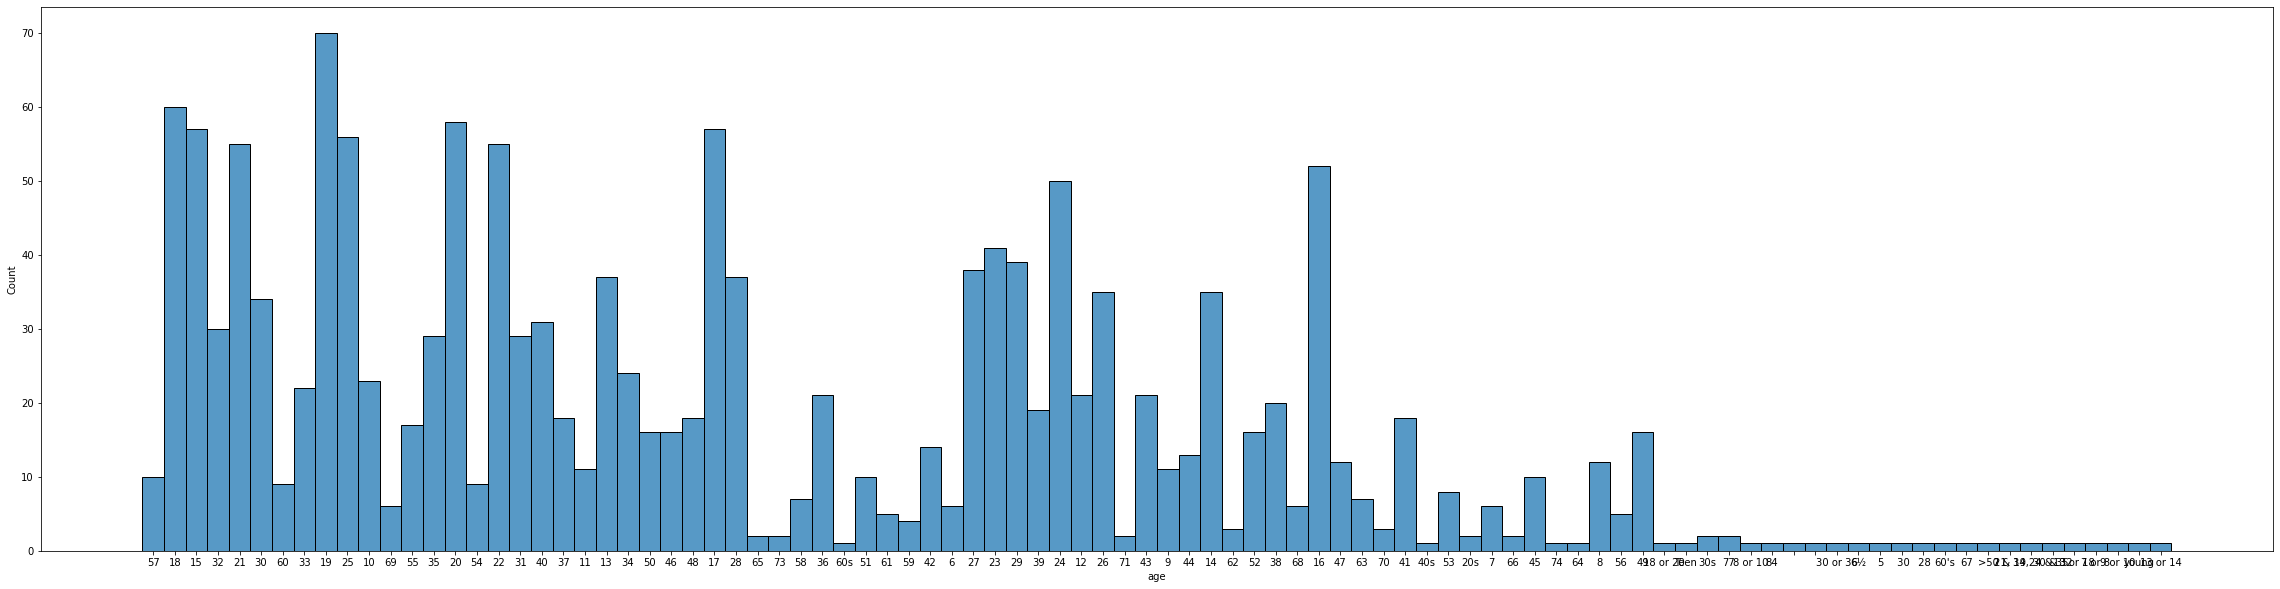

In [102]:
plt.figure(figsize=(40,10))

fig = sns.histplot( x="age", data=df_copia, bins=15)

#Sacamos el histograma para ver la distribución de los datos y así decidir que método estadístico usar. Usamos la mediana, ya que una media podría alterar mucho los resultados.

In [103]:
df_copia["age"].fillna(df["age"].median(), inplace=True)

TypeError: could not convert string to float: '60s'

In [82]:
df_copia["age"].isnull().sum()

0

In [83]:
df_copia.sample(4)

,case_number,year,country,area,location,sex_,age,species_,siglo,injury,date,mes,fatal_(y/n)_limpio,sex,country_
7604,1811.03.01,NaN,NaN,NaN,NaN,NaN,<bound method NDFrame._add_numeric_operations....,NaN,NaN,FATAL,01-Mar-1811,Mar,Y,F,NaN
2288,2012.05.31,NaN,NaN,NaN,NaN,NaN,<bound method NDFrame._add_numeric_operations....,NaN,NaN,Foot bitten,31-May-2012,May,N,F,NaN
4634,1977.08.14,NaN,NaN,NaN,NaN,NaN,<bound method NDFrame._add_numeric_operations....,NaN,NaN,Leg lacerated,14-Aug-1977,Aug,N,M,NaN
6677,1924.03.24,NaN,NaN,NaN,NaN,NaN,<bound method NDFrame._add_numeric_operations....,NaN,NaN,"No injury to occupants, shark bit boat",24-Mar-1924,Mar,N,M,NaN


En relación a la columna de country al tratarse de una columna de tipo categórica, reemplazad los valores nulos por una nueva categória que se llame Unknown.


In [84]:
df_copia["country"].replace(np.nan,"Unknown", inplace=True)

In [85]:
df_copia["country"].isnull().sum()

0

In [86]:
df_copia.sample(4)

,case_number,year,country,area,location,sex_,age,species_,siglo,injury,date,mes,fatal_(y/n)_limpio,sex,country_
919,1993.08.15.a,1993.0,usa,North Carolina,Pamlico Sound,F,19,Bull shark,siglo XX,NaN,NaN,NaN,NaN,F,usa
2324,2012.01.13,NaN,Unknown,NaN,NaN,NaN,<bound method NDFrame._add_numeric_operations....,NaN,NaN,"No injury, surfboard damaged",13-Jan-2012,Jan,N,F,NaN
6091,1946.04.00,NaN,Unknown,NaN,NaN,NaN,<bound method NDFrame._add_numeric_operations....,NaN,NaN,"No injury to occupants. Shark charged boat, to...",Apr-1946,NaN,N,M,NaN
5951,1950.10.08,NaN,Unknown,NaN,NaN,NaN,<bound method NDFrame._add_numeric_operations....,NaN,NaN,Right leg lacerated,28-Oct-1950,Oct,N,F,NaN


Reemplazad los valores nulos de la columna fatal por Unknown.


In [87]:
df_copia["fatal_(y/n)_limpio"].fillna("Unknown", inplace=True)

In [88]:
df_copia["fatal_(y/n)_limpio"].isnull().sum()

0

In [89]:
df_copia.sample(4)

,case_number,year,country,area,location,sex_,age,species_,siglo,injury,date,mes,fatal_(y/n)_limpio,sex,country_
2220,2012.11.27,NaN,Unknown,NaN,NaN,NaN,<bound method NDFrame._add_numeric_operations....,NaN,NaN,"Injury to ankle caused by a stingray, not a s...",27-Nov-2012,Nov,Unknown,F,NaN
4597,1979.03.00,NaN,Unknown,NaN,NaN,NaN,<bound method NDFrame._add_numeric_operations....,NaN,NaN,"Presumed FATAL, body not recovered",Mar-1979,NaN,Y,M,NaN
2430,2011.04.12,NaN,Unknown,NaN,NaN,NaN,<bound method NDFrame._add_numeric_operations....,NaN,NaN,Lacerations to forearm,13-Apr-2011,Apr,N,F,NaN
2564,2009.12.12,NaN,Unknown,NaN,NaN,NaN,<bound method NDFrame._add_numeric_operations....,NaN,NaN,No injury to occupants; shark bit steering oar,12-Dec-2009,Dec,N,M,NaN


Reemplazad los valores nulos de la columna type por el valor más frecuente (la moda).


In [90]:
# Como en base a las preguntas de la hipotesis hemos borrado la columna type, ya que hemos interpretado que la en esta pregunta: "¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?"
# Se refería a si era fatal o no, vamos a aplicar este  ejercicio sobre la columna "injury", que también es de tipo categórico.

In [105]:
df_copia["injury"].replace(np.nan, df_copia["injury"].mode, inplace=True)

In [92]:
df_copia["injury"].isnull().sum()

0

In [93]:
df_copia.sample()

,case_number,year,country,area,location,sex_,age,species_,siglo,injury,date,mes,fatal_(y/n)_limpio,sex,country_
3586,1999.11.00.b,NaN,Unknown,NaN,NaN,NaN,<bound method NDFrame._add_numeric_operations....,NaN,NaN,Lacerations to leg,Nov-1999,NaN,N,M,NaN


In [94]:
#df_copia.describe(include="object")

Reemplazad los valores nulos de la columna fecha por Unknown.


In [95]:
df_copia["date"].replace(np.nan, "Unknown", inplace=True)

In [96]:
df_copia["date"].isnull().sum()

0

In [97]:
df_copia.sample()

RecursionError: maximum recursion depth exceeded

RecursionError: maximum recursion depth exceeded

Guardad el csv para seguir trabajando con el en los siguientes ejercicios de pair

In [ ]:
df_copia.to_csv("datos/attacks_pandas_9.csv")

RecursionError: maximum recursion depth exceeded in __instancecheck__